## Imports

In [3]:
import numpy as np, scipy.io as sio, sklearn, scipy, random
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from scipy import stats
%matplotlib inline

## Load the Data [MNIST]

In [4]:
data = load_digits()
X = data['data']
y = data['target']

## K-Means Clustering Class

In [5]:
class K_Means():
    def __init__(self, k=2, max_iter=10, n_init=10):
        self.k = k
        self.max_iter = max_iter
        self.n_init = n_init
        self.means = np.random.randint(10,size=10)
        self.clusters = {}
    
    def cluster(self, X, means):
        bins  = {}
        _all = []
        temp_mat = np.zeros((1797, 10))
        _all = [np.linalg.norm(X-m, axis = 1) for m in means]
        for i in range(self.k):
            temp_mat[:,i] = _all[i]
        temp2 = np.argmin(temp_mat, axis = 1)
        i = 0
        for x in X:
            label = temp2[i]
            i+=1
            try:
                bins[label].append(x)
            except KeyError:
                bins[label] = [x]
        return bins
    
    def center(self, clusters):
        opt_means = []
        for k in clusters:
            opt_means.append(np.mean(clusters[k], axis = 0))
        return opt_means
    
    def converged(self, curr_means, trial_means):
        return np.array_equal(curr_means, trial_means)
    
    def predict(self, im):
        diff = self.means - im
        dist = np.sqrt(np.sum(diff**2, axis=-1))
        prediction = self.means[np.argmin(dist)]
        return np.argmin(dist)
        
    def fit(self, X):
        curr_means = [X[random.randint(0,len(X))] for i in range(self.k)]
        trial_means = [X[random.randint(0,len(X))] for i in range(self.k)]
        iter = 0
        while self.converged(curr_means, trial_means) != True and iter < self.max_iter:
            curr_means = trial_means
            bins = self.cluster(X, trial_means)
            trial_means = self.center(bins)
            iter += 1
            if (iter == self.max_iter):
                print("Max-Iteration reached before convergence")
        self.means = trial_means
        self.clusters = bins

## Visualizing

### Centers

The 6th Center


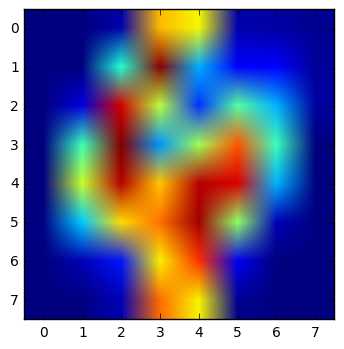

In [23]:
clf = K_Means(k = 10, max_iter = 200)
clf.fit(X)
print("The 6th Center")
plt.imshow(clf.means[6].reshape(8, 8))

## Testing

In [55]:
clf.predict(X[129]) # PREDICTED VALUE

8

In [54]:
y[129] # TARGET VALUE

8